In [1]:

import matplotlib.pyplot as plt
import pydicom as dcm
import os
from patchify import patchify,unpatchify
import numpy as np
from ct_prep import ct_preprocessing

resampled_slices=ct_preprocessing('SYNATSAKIS_KONSTANTINOS_30_12_2012_19_00')
# plt.imshow(resampled_slices[0,:,:,12],cmap='gray')
resampled_slices = np.squeeze(resampled_slices)
resampled_slices = np.transpose(resampled_slices,(2,0,1))
resampled_slices.shape

(64, 256, 256)

In [2]:
one_slice = dcm.read_file('SYNATSAKIS_KONSTANTINOS_30_12_2012_19_00\RoutineSeq  1.5  H30s\img009.dcm')
one_slice
name = one_slice[('0010','010')].value
age = one_slice[('0010','1010')].value[:-1]
sex = one_slice[('0010','0040')].value
age,sex,name

('024', 'M', 'SYNATSAKIS^KON/NOS^MICHAIL')

In [3]:
patient = {'name':name , 'age':age , 'sex':sex}

In [4]:
patient['name']

'SYNATSAKIS^KON/NOS^MICHAIL'

In [5]:
patches = []
for slice in np.squeeze(resampled_slices):
    patches.append(patchify(slice,(64,64),step=64))
patches =np.array(patches)

patches.shape
    

(64, 4, 4, 64, 64)

In [6]:
patient['patches']=patches

In [7]:
patient

{'name': 'SYNATSAKIS^KON/NOS^MICHAIL',
 'age': '024',
 'sex': 'M',
 'patches': array([[[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
            0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
           [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
            0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
           [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
            0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
           ...,
           [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
            4.32061702e-01, 5.83188176e-01, 3.75250548e-01],
           [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
            3.26804757e-01, 4.87685084e-01, 3.64458293e-01],
           [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
            2.77516365e-01, 2.85595298e-01, 3.66086900e-01]],
 
          [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
            0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
           [0.0000000

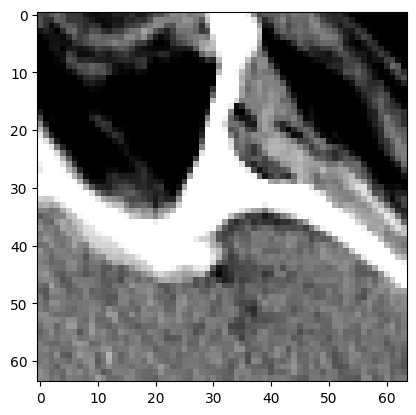

In [12]:
plt.imshow(patient['patches'][32,1,1,:,:],cmap='gray')

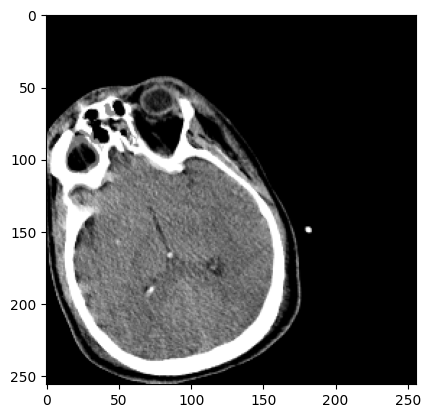

In [9]:
plt.imshow(unpatchify(patient['patches'][32],(256,256)),cmap='gray')